In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
import pandas as pd
from google.colab import files
data_to_load = files.upload()

Saving Automobile_insurance_fraud.csv to Automobile_insurance_fraud.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['Automobile_insurance_fraud.csv']))

In [ ]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
df.shape

(1000, 40)

In [ ]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
missing_val ={}
for i in df.columns:
    if df[i].isnull().sum() >0:
        missing_val[i] = df[i].isnull().sum()
print(missing_val)

{'_c39': 1000}


In [ ]:
df.drop("_c39",axis =1, inplace = True)

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


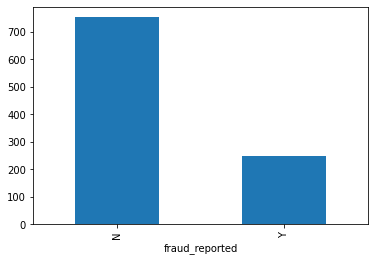

In [ ]:
df_count_fraud = df.groupby(['fraud_reported']).count()
df_fraud = df_count_fraud['policy_number']
df_fraud.plot.bar(x='Fraud Reported', y='Count')

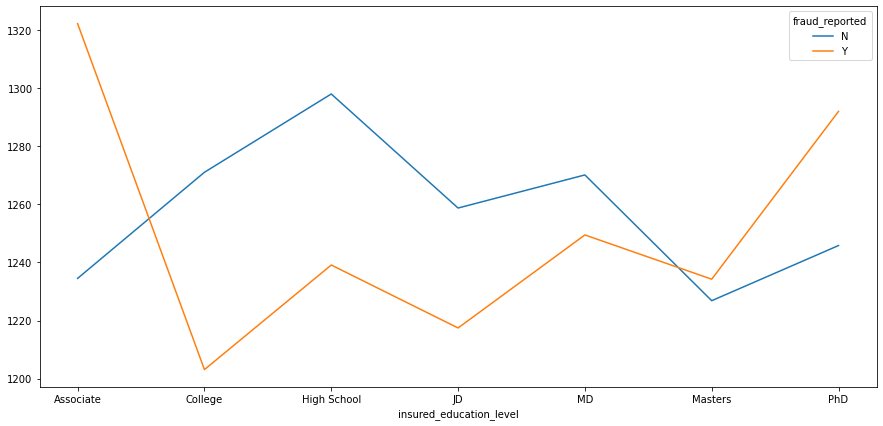

In [ ]:
#Annual premium of education level policy_annual_premium
import matplotlib.pyplot as plt

# plot data
fig, ax = plt.subplots(figsize=(15,7))
df_avg_prem = df.groupby(['insured_education_level', 'fraud_reported']).mean()['policy_annual_premium']
df_avg_prem.unstack().plot(ax=ax)

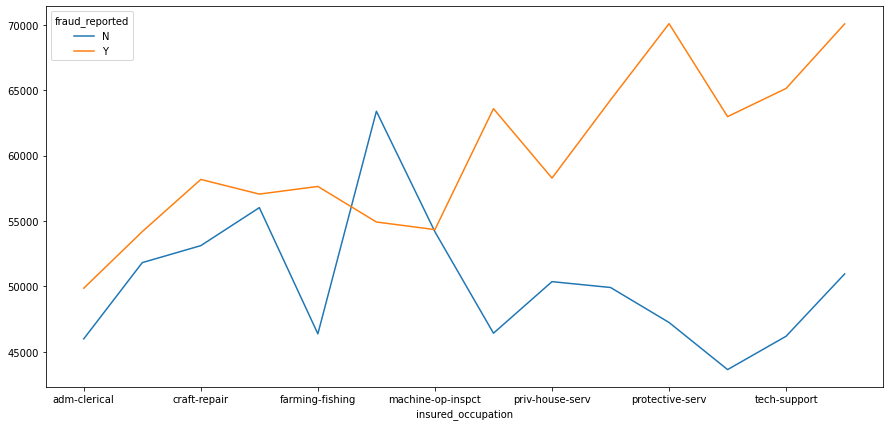

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['insured_occupation', 'fraud_reported']).mean()['total_claim_amount'].unstack().plot(ax=ax)

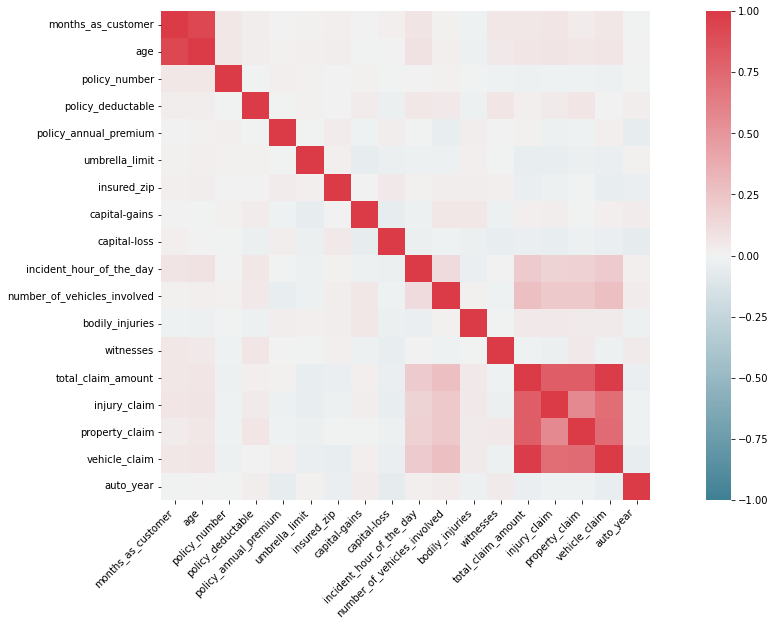

In [ ]:
import numpy as np 
import seaborn as sns

plt.figure(figsize=(20, 9))

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
#One-hot encoding all categorical columns except output column(i.e. fraud_reported)
list_hot_encoded = []
for column in df.columns:
    if(df[column].dtypes==object and column != 'fraud_reported'):
        df = pd.concat([df, pd.get_dummies(df[column], prefix=column)], axis=1)
        list_hot_encoded.append(column)
#Drop hot-encoded columns
df=df.drop(list_hot_encoded, axis=1)

#Binary encoder for output column
df['fraud_reported'] = df['fraud_reported'].map( {'Y':1, 'N':0})

df 

months_as_customer  age  policy_number  policy_deductable  \
0                   328   48         521585               1000   
1                   228   42         342868               2000   
2                   134   29         687698               2000   
3                   256   41         227811               2000   
4                   228   44         367455               1000   
..                  ...  ...            ...                ...   
995                   3   38         941851               1000   
996                 285   41         186934               1000   
997                 130   34         918516                500   
998                 458   62         533940               2000   
999                 456   60         556080               1000   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                  1406.91               0       466132          53300   
1                  1197.22         5000000       468176              0   
2                  1413.14         5000000       430632          35100   
3                  1415.74         6000000       608117          48900   
4                  1583.91         6000000       610706          66000   
..                     ...             ...          ...            ...   
995                1310.80               0       431289              0   
996                1436.79               0       608177          70900   
997                1383.49         3000000       442797          35100   
998                1356.92         5000000       441714              0   
999                 766.19               0       612260              0   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0               0                         5                            1   
1               0                         8                            1   
2               0                         7                            3   
3          -62400                         5                            1   
4          -46000                        20                            1   
..            ...                       ...                          ...   
995             0                        20                            1   
996             0                        23                            1   
997             0                         4                            3   
998             0                         2                            1   
999             0                         6                            1   

     bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                  1          2               71610          6510   
1                  0          0                5070           780   
2                  2          3               34650          7700   
3                  1          2               63400          6340   
4                  0          1                6500          1300   
..               ...        ...                 ...           ...   
995                0          1               87200         17440   
996                2          3              108480         18080   
997                2          3               67500          7500   
998                0          1               46980          5220   
999                0          3                5060           460   

     property_claim  vehicle_claim  auto_year  fraud_reported  \
0             13020          52080       2004               1   
1               780           3510       2007               1   
2              3850          23100       2007               0   
3              6340          50720       2014               1   
4               650           4550       2009               0   
..              ...            ...        ...             ...   
995            8720          61040       2006               0   
996           18080          72320       2015               0

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

y = df['fraud_reported']
X = df.drop(['fraud_reported'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
from sklearn import neighbors

#K-Nearest Neighbors
print("KNN Score :")
KNNClassifier = neighbors.KNeighborsClassifier(n_neighbors=12, weights='distance')
KNNClassifier.fit(X=X_train,y=y_train)
KNNClassifier.score(X_test,y_test)

KNN Score :


0.76

In [ ]:
KNN_y_predicted = KNNClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, KNN_y_predicted)

array([[111,   2],
       [ 34,   3]])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

print(classification_report(y_test, KNN_y_predicted))

scores = cross_val_score(KNNClassifier, X, y, cv=10, scoring='accuracy')
knn_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % knn_accuracy)

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       113
           1       0.60      0.08      0.14        37

    accuracy                           0.76       150
   macro avg       0.68      0.53      0.50       150
weighted avg       0.72      0.76      0.68       150

Cross-Validated Accuracy: 0.72


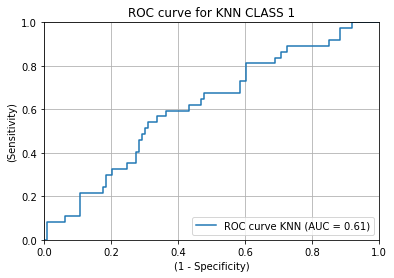

In [ ]:
from sklearn.metrics import roc_curve, auc
knn_pred_prob = KNNClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve KNN (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for KNN CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [ ]:
for i in range(30,200,40):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = i)
    LR = LogisticRegression()
    LR.fit(X_train,y_train)
    pred = LR.predict(X_test)
    print("accuracy_score",accuracy_score(y_test,pred),"random_state",i)
    print("classification _report","\n",classification_report(y_test,pred))
    print("confusion_matrix","\n",confusion_matrix(y_test,pred))
    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy_score 0.765 random_state 30
classification _report 
               precision    recall  f1-score   support

           0       0.77      0.99      0.87       154
           1       0.00      0.00      0.00        46

    accuracy                           0.77       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.59      0.77      0.67       200

confusion_matrix 
 [[153   1]
 [ 46   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

accuracy_score 0.73 random_state 70
classification _report 
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       146
           1       0.00      0.00      0.00        54

    accuracy                           0.73       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.73      0.62       200

confusion_matrix 
 [[146   0]
 [ 54   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

accuracy_score 0.77 random_state 110
classification _report 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       154
           1       0.00      0.00      0.00        46

    accuracy                           0.77       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.59      0.77      0.67       200

confusion_matrix 
 [[154   0]
 [ 46   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy_score 0.735 random_state 150
classification _report 
               precision    recall  f1-score   support

           0       0.73      1.00      0.85       146
           1       1.00      0.02      0.04        54

    accuracy                           0.73       200
   macro avg       0.87      0.51      0.44       200
weighted avg       0.81      0.73      0.63       200

confusion_matrix 
 [[146   0]
 [ 53   1]]
accuracy_score 0.835 random_state 190
classification _report 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       166
           1       0.67      0.06      0.11        34

    accuracy                           0.83       200
   macro avg       0.75      0.53      0.51       200
weighted avg       0.81      0.83      0.77       200

confusion_matrix 
 [[165   1]
 [ 32   2]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
Model = [RandomForestClassifier(), DecisionTreeClassifier(), SVC(),KNeighborsClassifier(),GaussianNB()]
for i in Model:
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 190)
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print("accuracy_score",accuracy_score(y_test,pred),i)
    print("classification _report","\n",classification_report(y_test,pred))
    print("confusion_matrix","\n",confusion_matrix(y_test,pred))

accuracy_score 0.785 RandomForestClassifier()
classification _report 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       166
           1       0.15      0.06      0.09        34

    accuracy                           0.79       200
   macro avg       0.49      0.50      0.48       200
weighted avg       0.71      0.79      0.74       200

confusion_matrix 
 [[155  11]
 [ 32   2]]
accuracy_score 0.83 DecisionTreeClassifier()
classification _report 
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       166
           1       0.50      0.65      0.56        34

    accuracy                           0.83       200
   macro avg       0.71      0.76      0.73       200
weighted avg       0.85      0.83      0.84       200

confusion_matrix 
 [[144  22]
 [ 12  22]]
accuracy_score 0.83 SVC()
classification _report 
               precision    recall  f1-score   support

           0   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy_score 0.63 GaussianNB()
classification _report 
               precision    recall  f1-score   support

           0       0.87      0.66      0.75       166
           1       0.23      0.50      0.31        34

    accuracy                           0.63       200
   macro avg       0.55      0.58      0.53       200
weighted avg       0.76      0.63      0.67       200

confusion_matrix 
 [[109  57]
 [ 17  17]]


In [ ]:
RF = RandomForestClassifier()

para = {"n_estimators" :[100,200,300],
       "max_depth":[2,3,4,5,6],
       "min_samples_split":[2,3,4,5],
       "criterion":["gini","entropy"] }

grid_score = GridSearchCV(RF,para,scoring = "f1",cv = 5,n_jobs= -1,verbose =2)
grid_score.fit(X_train,y_train)
print(grid_score.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 100}
